# <center><span style = 'color:#4287f5'>Sentiment Analysis IMDB 50k Movie Dataset</span></center>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename) 
        print(os.path.join(dirname, filename))

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
# Read IMDB Dataset
df = pd.read_csv(filepath)

# 1.1 Understanding Data

In [3]:
#Display First 5 Rows of Data
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Provide detailed information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
# Count the occurrences of each unique value in the sentiment column
df.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [6]:
# Descriptive Statistics for the DataFrame
df.describe().T

,count,unique,top,freq
review,50000,49582,Loved today's show!!! It was a variety and not...,5
sentiment,50000,2,positive,25000


# 1.2 Exploratory Data Analysis (EDA)

In [7]:
#sentiment count: 
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

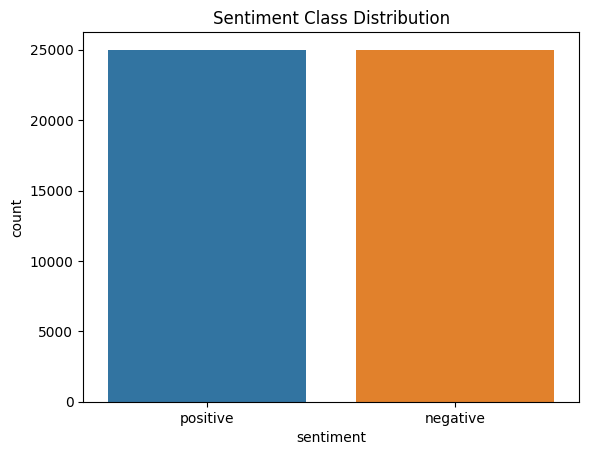

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Class Distribution")
plt.show()

<Axes: >

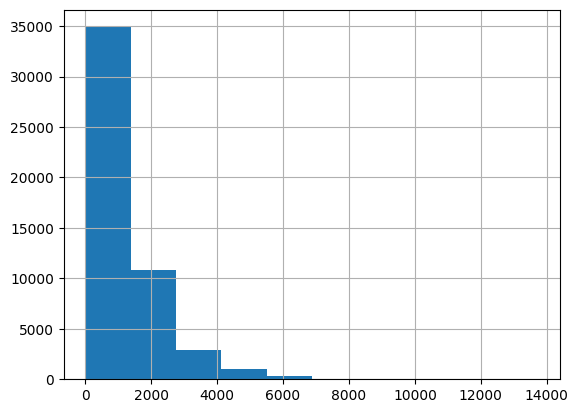

In [9]:
# Number of characters present in each sentence
df['review'].str.len().hist()

The histogram shows that reviews range from 10 to 14000 characters and generally, it is between 10 to 1500 characters.

Now, we will move on the histogram for positive review and negative review respectively. Let's plot!

Text(0.5, 1.0, 'Negative Reviews')

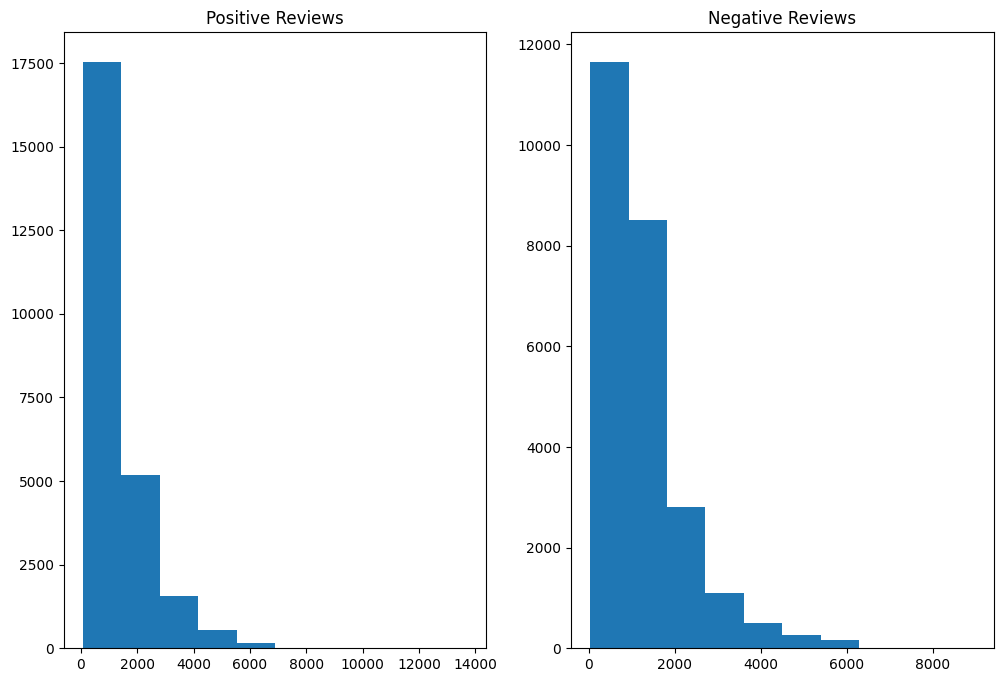

In [10]:
# Histogram for positive review and negative review respectively
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(df[df['sentiment']=='positive']['review'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['sentiment']=='negative']['review'].str.len())
ax2.set_title( 'Negative Reviews')

We can observe some insights from the graph above:

* In general, people comment less word in the positive review to compare with negative review
* However, the range of word for positive review are bigger than the range of negative review. It means in some cases, people give a long comments for excellent movies and people could less critise for bad movies

Before we move on to the next section: data preprocessing to clean the text data, we will make a wordcloud graph to show the most used words in large font and the least used words in small font in positive review and negative review

In [11]:
# Review Length Analysis
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
df['review_length'].describe()

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


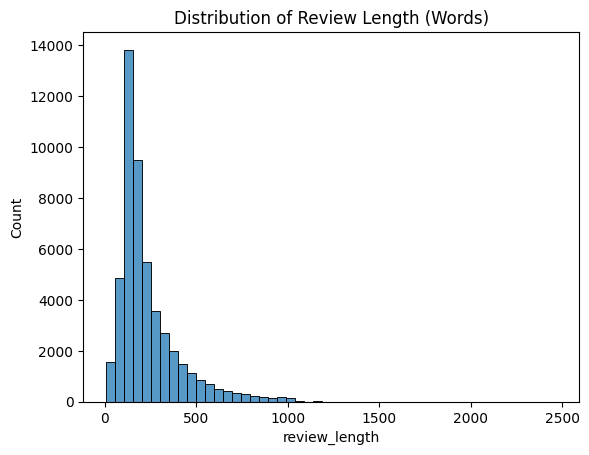

In [12]:
sns.histplot(df['review_length'], bins=50)
plt.title("Distribution of Review Length (Words)")
plt.show()

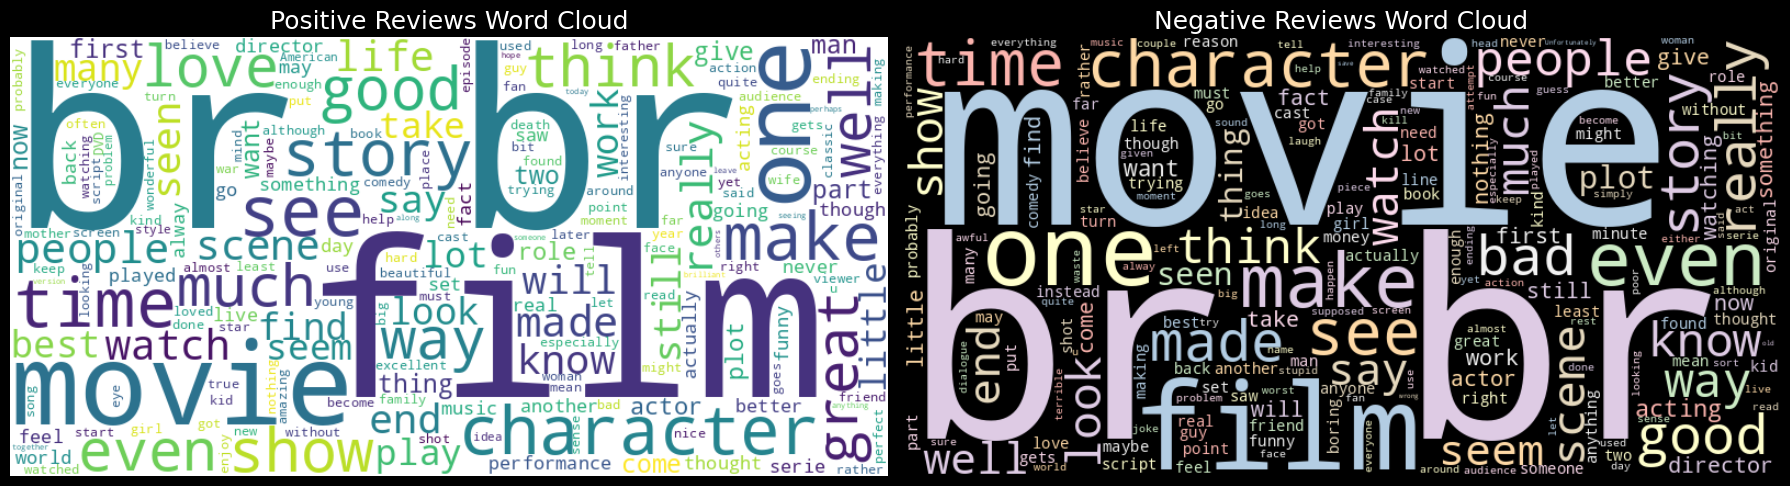

In [13]:
# Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all positive and negative reviews into single strings
positive_text = " ".join(df[df['sentiment'] == 'positive']['review'])
negative_text = " ".join(df[df['sentiment'] == 'negative']['review'])

# Create word clouds
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='black', colormap='Pastel1').generate(negative_text)

# Plot the word clouds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Positive review word cloud
ax1.imshow(positive_wc, interpolation='bilinear')
ax1.set_title('Positive Reviews Word Cloud', fontsize=18, color='white')
ax1.axis('off')

# Negative review word cloud
ax2.imshow(negative_wc, interpolation='bilinear')
ax2.set_title('Negative Reviews Word Cloud', fontsize=18, color='white')
ax2.axis('off')
fig.patch.set_facecolor('black')  # Optional: Black border background for whole figure

plt.tight_layout()
plt.show()

The wordcloud graphs in both negative and postitive comments don't show meaningful result.

That's is the reason why text preprosessing is needed.

Let's start the preproceesing process.

In [14]:
# Top Frequent Words (before removing stopwords)
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

all_words = ' '.join(df['review']).lower()
tokens = word_tokenize(all_words)
word_freq = Counter(tokens)

print(word_freq.most_common(20))  # Top 20 frequent words

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('the', 664213), (',', 544030), ('.', 463477), ('and', 323076), ('a', 321247), ('of', 288526), ('to', 267033), ('is', 216900), ('/', 202455), ('>', 202250), ('<', 202094), ('br', 201951), ('it', 187987), ('in', 185215), ('i', 173683), ('this', 150142), ('that', 143307), ("'s", 122131), ('was', 99809), ('as', 91549)]


# 1.3 Data Preprocessing

<h2>1.3.1 Check Null or Empty</h2>

In [15]:
# Check Null or Empty
null_values = df.isnull().sum() #identifying missing values

In [16]:
null_values.index[0]

'review'

In [17]:
print('There are {} missing values for {} and {} missing values for {}.'.format(null_values[0],null_values.index[0],null_values[1],null_values.index[1]))

There are 0 missing values for review and 0 missing values for sentiment.


/tmp/ipykernel_31/1794822848.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('There are {} missing values for {} and {} missing values for {}.'.format(null_values[0],null_values.index[0],null_values[1],null_values.index[1]))


<h2>1.3.2Check Duplicate Rows</h2>

In [18]:
# Check Duplicate Rows
num_duplicates = df.duplicated().sum() #identify duplicates
print('There are {} duplicate reviews present in the dataset'.format(num_duplicates))

There are 418 duplicate reviews present in the dataset


In [19]:
# View duplicate reviews
review = df['review']
duplicated_review = df[review.isin(review[review.duplicated()])].sort_values("review")
duplicated_review.head(6)

,review,sentiment,review_length
34058,"""Go Fish"" garnered Rose Troche rightly or wron...",negative,131
47467,"""Go Fish"" garnered Rose Troche rightly or wron...",negative,131
29956,"""Three"" is a seriously dumb shipwreck movie. M...",negative,367
31488,"""Three"" is a seriously dumb shipwreck movie. M...",negative,367
47527,"""Witchery"" might just be the most incoherent a...",negative,285
2976,"""Witchery"" might just be the most incoherent a...",negative,285


In [20]:
# Drop duplicate reviews
df.drop_duplicates(inplace = True)
print('The dataset contains {} rows and {} columns after removing duplicates'.format(df.shape[0],df.shape[1]))

The dataset contains 49582 rows and 3 columns after removing duplicates


<h2>1.3.3 Import Libraries and Initialize Tools</h2>

In [21]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download if not already downloaded
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = nltk.stem.WordNetLemmatizer()

<h2>1.3.4 Clean HTML and Special Characters</h2>

In [22]:
def clean_text(text):
    text = re.sub('<.*?>', ' ', text)  # Remove HTML tags
    text = re.sub('\W', ' ', text)     # Remove special characters
    text = re.sub('\s+[a-zA-Z]\s+', ' ', text)  # Remove single characters
    text = re.sub('\s+', ' ', text)    # Normalize whitespace
    return text

<h2>1.3.5 Tokenization, Remove Stopwords and Lemmatize</h2>

In [23]:
def remove_stopwords_and_lemmatize(text):
    tokens = word_tokenize(text)
    filtered_tokens = [
        lemmatizer.lemmatize(token.lower())
        for token in tokens
        if token.lower() not in stop_words
    ]
    return " ".join(filtered_tokens)

<h2>1.3.6 Full Preprocessing Pipeline</h2>

In [24]:
def preprocess_review(review):
    cleaned = clean_text(review)
    processed = remove_stopwords_and_lemmatize(cleaned)
    return processed

In [25]:
# Ensure DataFrame has a proper index
df = df.reset_index(drop=True)

# Ensure the DataFrame has at least 50,000 rows
num_reviews = len(df)
if num_reviews < 50000:
    print(f"Dataset contains {num_reviews} rows. Processing only available rows.")
    max_reviews = num_reviews
else:
    max_reviews = 50000

# Apply Preprocessing to Dataset
processed_review = []

# Loop through the first 'max_reviews' reviews
for review in range(0, max_reviews):
    single_review = df.loc[review, 'review']
    processed = preprocess_review(single_review)
    processed_review.append(processed)

# Example: Print the 10th processed review
print(processed_review[10])

Dataset contains 49582 rows. Processing only available rows.
phil alien one quirky film humour based around oddness everything rather actual punchlines first odd pretty funny movie progressed find joke oddness funny anymore low budget film thats never problem pretty interesting character eventually lost interest imagine film would appeal stoner currently partaking something similar better try brother another planet


# 1.5 Split into Training and Testing Sets

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(processed_review, df.sentiment, test_size=0.30, random_state=42)

# 1.4 TF-IDF Vectorization

In [27]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Then fit the vectorizer only on the training texts
tfidf = TfidfVectorizer(
    min_df=5,
    max_df=0.6,
    ngram_range=(1, 2),
    stop_words='english',
    max_features=10000  # Keep only the top 10,000 features
)

X_train = tfidf.fit_transform(X_train) # Learn vocab + compute tf-idf on training data
X_test = tfidf.transform(X_test)  # Only transform, not fit! Use learned vocab to transform test data

# 1.6 Encoding Sentiment Labels for Binary Classification

In [28]:
# Encoding sentiment labels to numerical values
Y_train = (Y_train.replace({'positive': 1, 'negative': 0})).values
Y_test = (Y_test.replace({'positive': 1, 'negative': 0})).values

/tmp/ipykernel_31/837481233.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_train = (Y_train.replace({'positive': 1, 'negative': 0})).values
/tmp/ipykernel_31/837481233.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_test = (Y_test.replace({'positive': 1, 'negative': 0})).values


# 1.7 Build Supervised Text Classification

<h3>A. Logistic Regression</h3>

Accuracy: 0.8880

Classification Report:
              precision    recall  f1-score   support

    Negative     0.8979    0.8744    0.8860      7404
    Positive     0.8787    0.9015    0.8899      7471

    accuracy                         0.8880     14875
   macro avg     0.8883    0.8879    0.8880     14875
weighted avg     0.8883    0.8880    0.8880     14875


Confusion Matrix:
[[6474  930]
 [ 736 6735]]


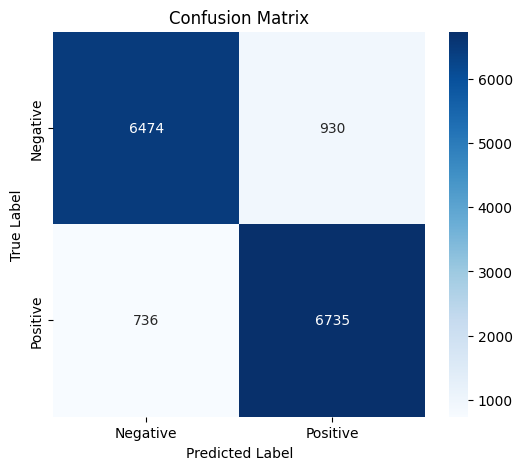

In [29]:
# Logistic Regression
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
 
# Step 1: Train a Logistic Regression classifier
basic_log_reg_model = LogisticRegression(max_iter=10000)
basic_log_reg_model.fit(X_train, Y_train)
 
# Step 2: Make predictions on the test set
Y_predict = basic_log_reg_model.predict(X_test)
 
# Step 3: Evaluate the model
accuracy = accuracy_score(Y_test, Y_predict)
print(f"Accuracy: {accuracy:.4f}")
 
# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_predict, target_names=['Negative','Positive'],digits=4))
 
# Print confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict)
print("\nConfusion Matrix:")
print(conf_matrix)
 
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

<h3>B. Multinomial Naive Bayes</h3>

Accuracy: 0.8592

Classification Report:
              precision    recall  f1-score   support

    Negative     0.8701    0.8429    0.8563      7404
    Positive     0.8490    0.8753    0.8619      7471

    accuracy                         0.8592     14875
   macro avg     0.8595    0.8591    0.8591     14875
weighted avg     0.8595    0.8592    0.8591     14875


Confusion Matrix:
[[6241 1163]
 [ 932 6539]]


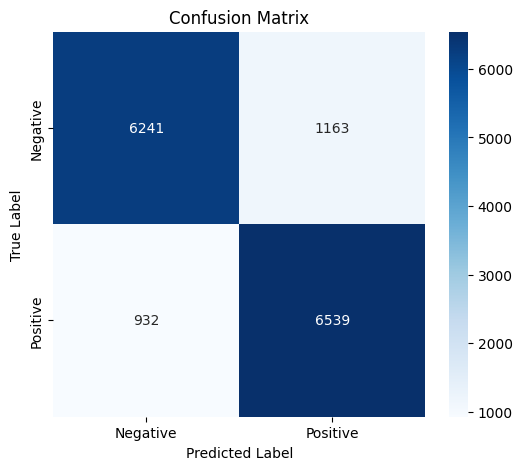

In [30]:
# Multinomial Naive Bayes
# Import necessary libraries
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Train a Multinomial Naive Bayes classifier
basic_MNB_model = MultinomialNB()
basic_MNB_model.fit(X_train, Y_train)

# Step 2: Make predictions on the test set
Y_predict = basic_MNB_model.predict(X_test)

# Step 3: Evaluate the model
accuracy = accuracy_score(Y_test, Y_predict)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_predict, target_names=['Negative','Positive'],digits=4))

# Print confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

<h3>C. Support Vector Machine (Linear SVC)</h3>

Accuracy: 0.8801

Classification Report:
              precision    recall  f1-score   support

    Negative     0.8881    0.8684    0.8782      7404
    Positive     0.8724    0.8916    0.8819      7471

    accuracy                         0.8801     14875
   macro avg     0.8803    0.8800    0.8800     14875
weighted avg     0.8802    0.8801    0.8800     14875


Confusion Matrix:
[[6430  974]
 [ 810 6661]]


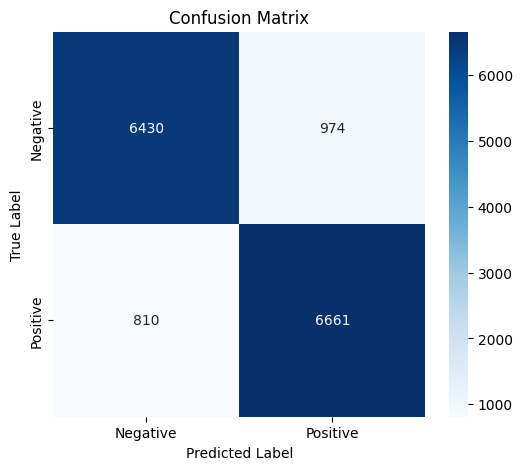

In [31]:
# Import necessary libraries
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Step 1: Train a SVM classifier
basic_SVC_model = LinearSVC(max_iter=10000)
basic_SVC_model.fit(X_train, Y_train)

# Step 2: Make predictions on the test set
Y_predict = basic_SVC_model.predict(X_test)

# Step 3: Evaluate the model
accuracy = accuracy_score(Y_test, Y_predict)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_predict, target_names=['Negative','Positive'],digits=4))

# Print confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

<h3>D. Decision Tree</h3>

Test Accuracy: 0.7101

Classification Report:
              precision    recall  f1-score   support

    Negative     0.7038    0.7208    0.7122      7404
    Positive     0.7165    0.6994    0.7079      7471

    accuracy                         0.7101     14875
   macro avg     0.7102    0.7101    0.7100     14875
weighted avg     0.7102    0.7101    0.7100     14875


Confusion Matrix:
[[5337 2067]
 [2246 5225]]


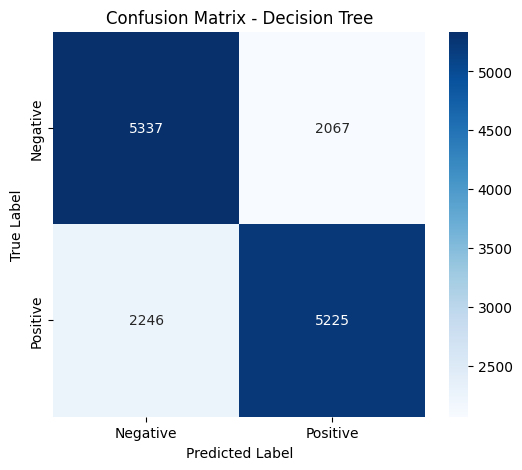

In [ ]:
# Decision Tree
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Train a Decision Tree classifier
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, Y_train)

# Step 2: Make predictions on the test sets
Y_test_predict = modelDT.predict(X_test)

# Evaluate the model on test set
test_accuracy = accuracy_score(Y_test, Y_test_predict)
print(f"Accuracy: {test_accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_test_predict, target_names=['Negative','Positive'],digits=4))

# Print confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_test_predict)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 1.8 Hyperparameter Tuning, Cross Validation and Fine Tuned Model

<h3>A. Logistic Regression</h3>

In [33]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Define the model
log_reg = LogisticRegression(max_iter=10000)

param_grid = {
    # Use np.linspace for the 'C' parameter
    # 'C': [1.7241379310344827],  # Regularization strength values
    'C': np.linspace(1, 4, 30),
    'penalty': ['l1', 'l2'], # l2 is standard regularization, l1 requires solver='liblinear'
    'solver': ['liblinear']  # liblinear is suitable for datasets with binary class and supports both l1 and l2 penalties
}

# Set up GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, Y_train)

# Get the best model
best_log_reg = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best hyperparameters: {'C': 1.7241379310344827, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8879477769807014


<h3>B. Multinomial Naive Bayes</h3>

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Define the model
MNB = MultinomialNB()

alphas = np.linspace(0.01, 6.0, 30)

# Define parameter grid for tuning
# For MultinomialNB, the key hyperparameter is 'alpha' (smoothing parameter)
param_grid = {'alpha': alphas}

# Set up GridSearchCV
grid_search = GridSearchCV(MNB, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, Y_train)

# Get the best model
best_MNB = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters: {'alpha': 5.173793103448276}
Best Score: 0.8596247642028372


<h3>C. Support Vector Machine (LinearSVC)</h3>

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import numpy as np

# Define the model
lsvc = LinearSVC(max_iter=10000)

# More precise values of C around typical optimal range
param_grid = {
    'C': np.linspace(0.1, 1, 30),
}

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(lsvc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, Y_train)

# Get the best model
best_SVC = grid_search.best_estimator_

# Best model and parameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters: {'C': 0.16206896551724137}
Best Score: 0.8874867483104809


<h3>D. Decision Tree</h3>

In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the model
DT = DecisionTreeClassifier()
# Define parameter grid for tuning
param_grid = {
    'max_depth': [50],
    'min_samples_split': [10],
    'min_samples_leaf': [50],
    'criterion': ['gini']
}

# Set up GridSearchCV
grid_search = GridSearchCV(DT, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, Y_train)

# Get the best model
best_DT = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best hyperparameters: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 50, 'min_samples_split': 10}
Best Score: 0.7523841087063367


# 1.9 Check Overfitting

<h2>1.9.1 Train vs Test Accuracy</h2>

Model                   Train Acc     Test Acc         Diff
--------------------------------------------------------
Logistic Regression        0.9318       0.8896       0.0422
Multinomial NB             0.8732       0.8616       0.0115
Linear SVC                 0.9321       0.8899       0.0422
Decision Tree              0.7902       0.7522       0.0380


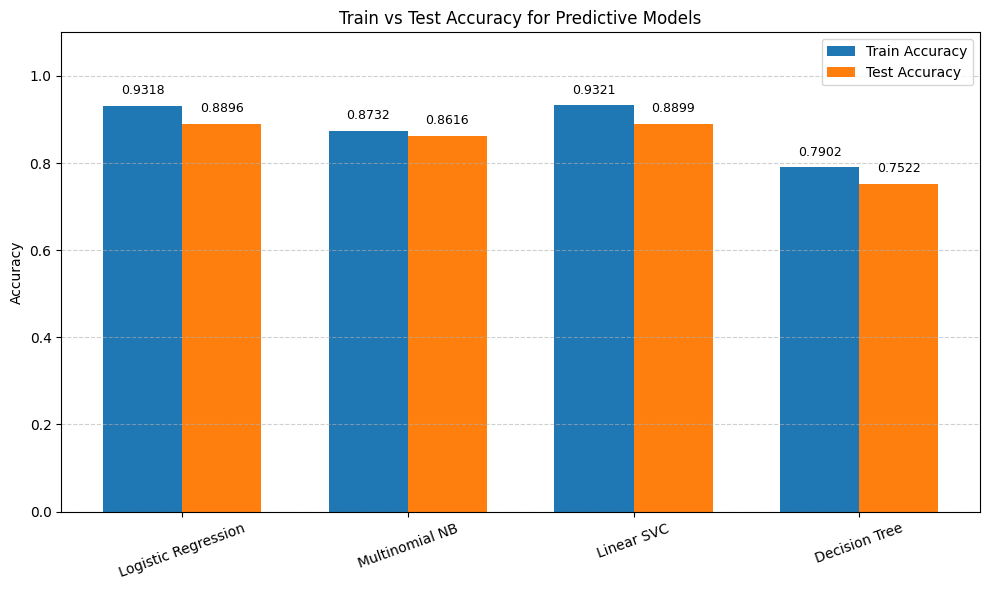

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Store results
results = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Difference': []
}

# List of models with labels
models = {
    'Logistic Regression': best_log_reg,
    'Multinomial NB': best_MNB,
    'Linear SVC': best_SVC,
    'Decision Tree': best_DT
}

# Evaluate each model
for name, model in models.items():
    train_acc = accuracy_score(Y_train, model.predict(X_train))
    test_acc = accuracy_score(Y_test, model.predict(X_test))
    diff = train_acc - test_acc
    
    results['Model'].append(name)
    results['Train Accuracy'].append(train_acc)
    results['Test Accuracy'].append(test_acc)
    results['Difference'].append(diff)

# === Print table of results ===
print(f"{'Model':<20} {'Train Acc':>12} {'Test Acc':>12} {'Diff':>12}")
print("-" * 56)
for i in range(len(results['Model'])):
    print(f"{results['Model'][i]:<20} {results['Train Accuracy'][i]:>12.4f} {results['Test Accuracy'][i]:>12.4f} {results['Difference'][i]:>12.4f}")

# === Plot Bar Chart ===
x = range(len(results['Model']))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar([i - width/2 for i in x], results['Train Accuracy'], width=width, label='Train Accuracy')
bars2 = plt.bar([i + width/2 for i in x], results['Test Accuracy'], width=width, label='Test Accuracy')

# Add value labels on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.4f}', ha='center', va='bottom', fontsize=9)

plt.xticks(x, results['Model'], rotation=20)
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.title('Train vs Test Accuracy for Predictive Models')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<h2>1.9.2 ROC Curve</h2>

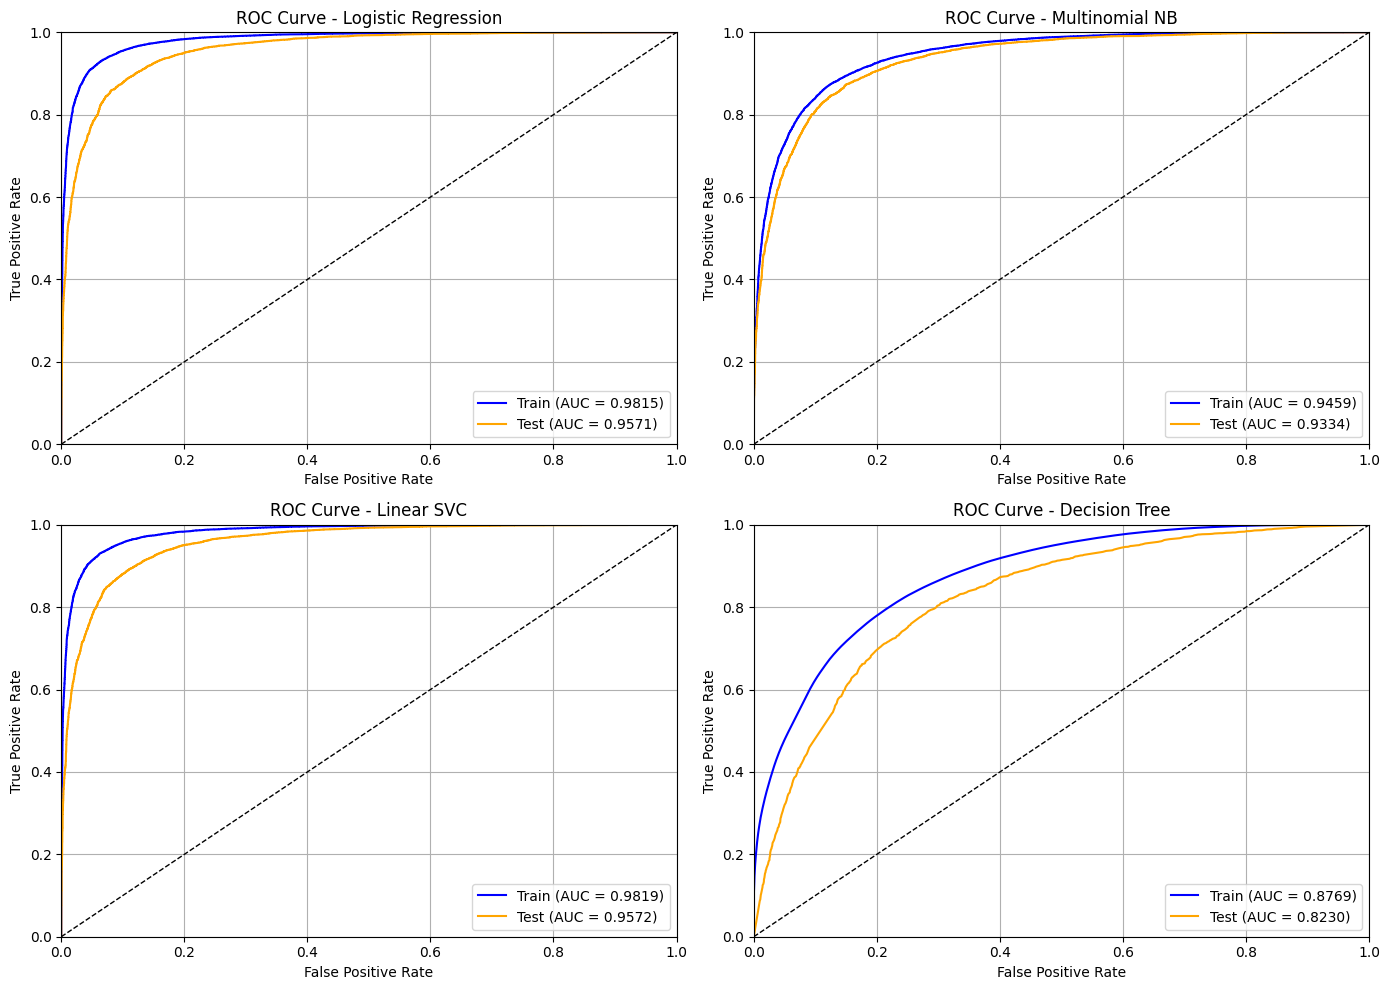

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to get decision scores or probabilities
def get_scores(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    elif hasattr(model, "decision_function"):
        return model.decision_function(X)
    else:
        return model.predict(X)

# List of models and names
models = {
    'Logistic Regression': best_log_reg,
    'Multinomial NB': best_MNB,
    'Linear SVC': best_SVC,
    'Decision Tree': best_DT
}

# Create subplots: 2 rows x 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()  # Flatten 2D array to 1D for easy iteration

for i, (model_name, model) in enumerate(models.items()):
    ax = axes[i]
    
    # Train ROC
    y_train_score = get_scores(model, X_train)
    fpr_train, tpr_train, _ = roc_curve(Y_train, y_train_score)
    auc_train = auc(fpr_train, tpr_train)

    # Test ROC
    y_test_score = get_scores(model, X_test)
    fpr_test, tpr_test, _ = roc_curve(Y_test, y_test_score)
    auc_test = auc(fpr_test, tpr_test)

    # Plot ROC curves
    ax.plot(fpr_train, tpr_train, label=f'Train (AUC = {auc_train:.4f})', color='blue')
    ax.plot(fpr_test, tpr_test, label=f'Test (AUC = {auc_test:.4f})', color='orange')
    ax.plot([0, 1], [0, 1], 'k--', lw=1)

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_title(f'ROC Curve - {model_name}')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.grid(True)
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

# 1.10 Evaluation of the Model

<h2>1.10.1 Import Neccessary Libraries</h2>

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

<h2>1.10.2 Accuracy & Classfication Report</h2>

<h3>A. Logistic Regression</h3>

In [40]:
# Logistic Regression
from sklearn import metrics
 
# Now, you can evaluate the best model
accuracy_score = metrics.accuracy_score(best_log_reg.predict(X_test), Y_test)
print("Acccuracy: ", str('{:04.2f}'.format(accuracy_score * 100)) + " %\n")

# Classification Report
print("Logistic Regression Classification Report: \n", 
      classification_report(Y_test, best_log_reg.predict(X_test), 
                            target_names=['Negative','Positive'], digits=4))

Acccuracy:  88.96 %

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

    Negative     0.8994    0.8763    0.8877      7404
    Positive     0.8804    0.9028    0.8915      7471

    accuracy                         0.8896     14875
   macro avg     0.8899    0.8896    0.8896     14875
weighted avg     0.8899    0.8896    0.8896     14875



<h3>B. Multinomial Naive Bayes</h3>

In [41]:
# Multinomial Naive Bayes
from sklearn import metrics
 
# Now, you can evaluate the best model
accuracy_score = metrics.accuracy_score(best_MNB.predict(X_test), Y_test)
print("Acccuracy: ", str('{:04.2f}'.format(accuracy_score * 100)) + " %\n")

# Classification Report
print("Multinomial NB Classification Report: \n", 
      classification_report(Y_test, best_MNB.predict(X_test), 
                            target_names=['Negative','Positive'], digits=4))

Acccuracy:  86.16 %

Multinomial NB Classification Report: 
               precision    recall  f1-score   support

    Negative     0.8696    0.8494    0.8594      7404
    Positive     0.8541    0.8738    0.8638      7471

    accuracy                         0.8616     14875
   macro avg     0.8619    0.8616    0.8616     14875
weighted avg     0.8618    0.8616    0.8616     14875



<h3>C. Support Vector Machine (Linear SVC)</h3>

In [42]:
# Support Vector Machine (LinearSVC)
from sklearn import metrics
 
# Now, you can evaluate the best model
accuracy_score = metrics.accuracy_score(best_SVC.predict(X_test), Y_test)
print("Acccuracy: ", str('{:04.2f}'.format(accuracy_score * 100)) + " %\n")

# Classification Report
print("Linear SVC Classification Report: \n", 
      classification_report(Y_test, best_SVC.predict(X_test), 
                            target_names=['Negative','Positive'], digits=4))

Acccuracy:  88.99 %

Linear SVC Classification Report: 
               precision    recall  f1-score   support

    Negative     0.9009    0.8751    0.8878      7404
    Positive     0.8796    0.9046    0.8919      7471

    accuracy                         0.8899     14875
   macro avg     0.8902    0.8898    0.8898     14875
weighted avg     0.8902    0.8899    0.8899     14875



<h3>D. Decision Tree</h3>

In [43]:
# Decision Tree
from sklearn import metrics
 
# Now, you can evaluate the best model
accuracy_score = metrics.accuracy_score(best_DT.predict(X_test), Y_test)
print("Acccuracy: ", str('{:04.2f}'.format(accuracy_score * 100)) + " %\n")

# Classification Report
print("Random Forest Classification Report: \n", 
      classification_report(Y_test, best_DT.predict(X_test), 
                            target_names=['Negative','Positive'], digits=4))

Acccuracy:  75.22 %

Random Forest Classification Report: 
               precision    recall  f1-score   support

    Negative     0.7544    0.7446    0.7495      7404
    Positive     0.7501    0.7597    0.7549      7471

    accuracy                         0.7522     14875
   macro avg     0.7522    0.7522    0.7522     14875
weighted avg     0.7522    0.7522    0.7522     14875



<h2>1.10.3 Box Plot</h2>

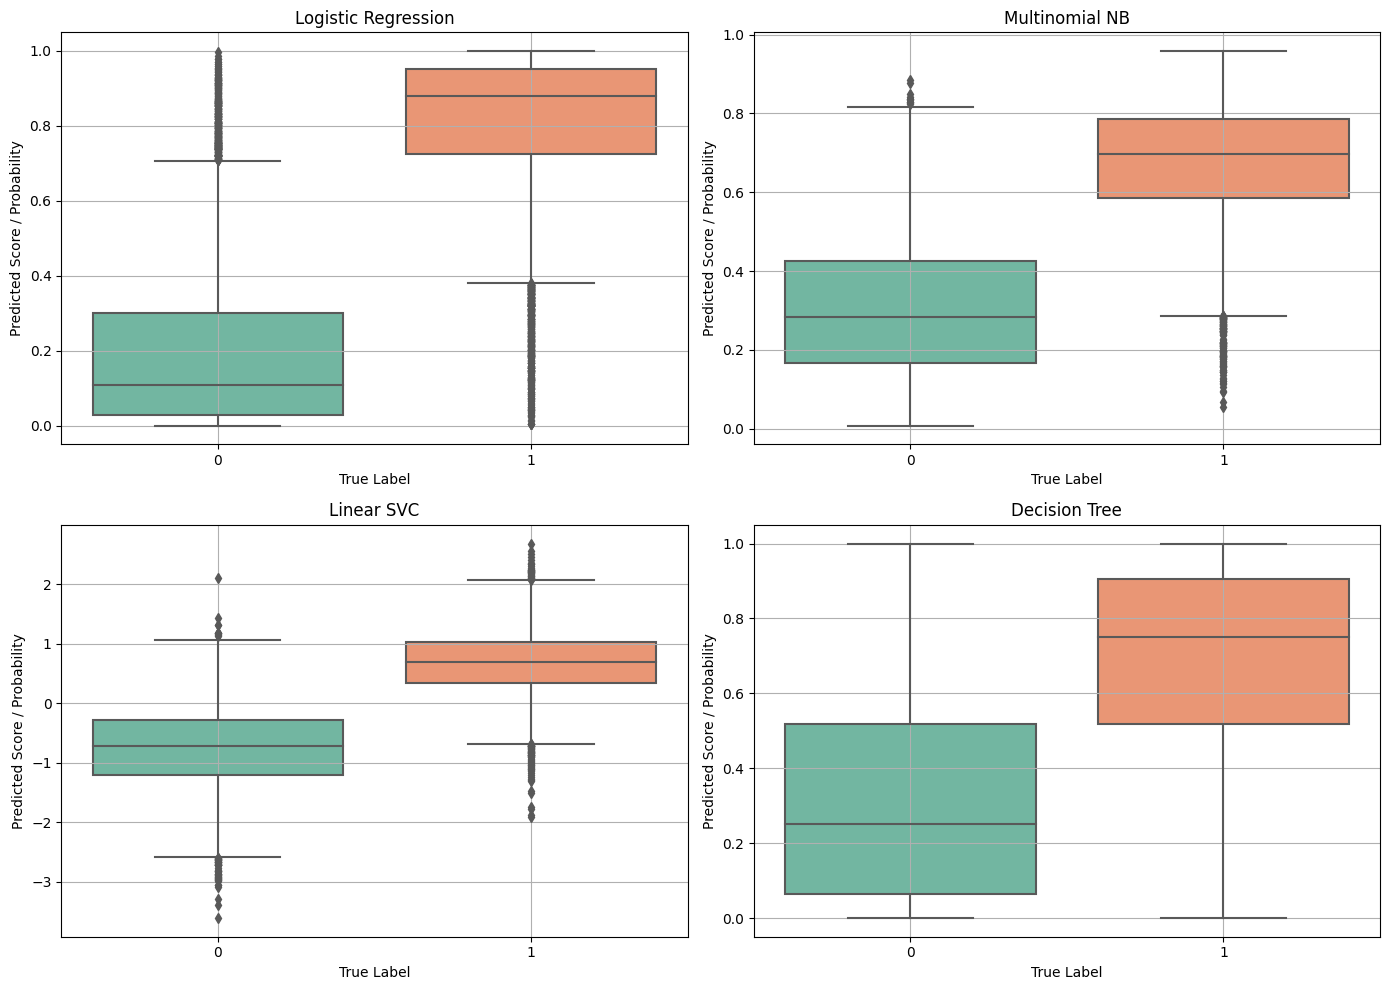

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Make sure seaborn is installed:
# pip install seaborn

models = {
    'Logistic Regression': best_log_reg,
    'Multinomial NB': best_MNB,
    'Linear SVC': best_SVC,
    'Decision Tree': best_DT
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    ax = axes[i]

    # Get predicted probabilities or decision function
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = model.predict(X_test)

    # Create a DataFrame for plotting
    df = pd.DataFrame({
        'Predicted Score': y_score,
        'True Label': Y_test
    })

    sns.boxplot(data=df, x='True Label', y='Predicted Score', ax=ax, palette='Set2')
    ax.set_title(f"{name}")
    ax.set_xlabel("True Label")
    ax.set_ylabel("Predicted Score / Probability")
    ax.grid(True)

plt.tight_layout()
plt.show()


<h2>1.10.4 Confusion Matrix</h2>

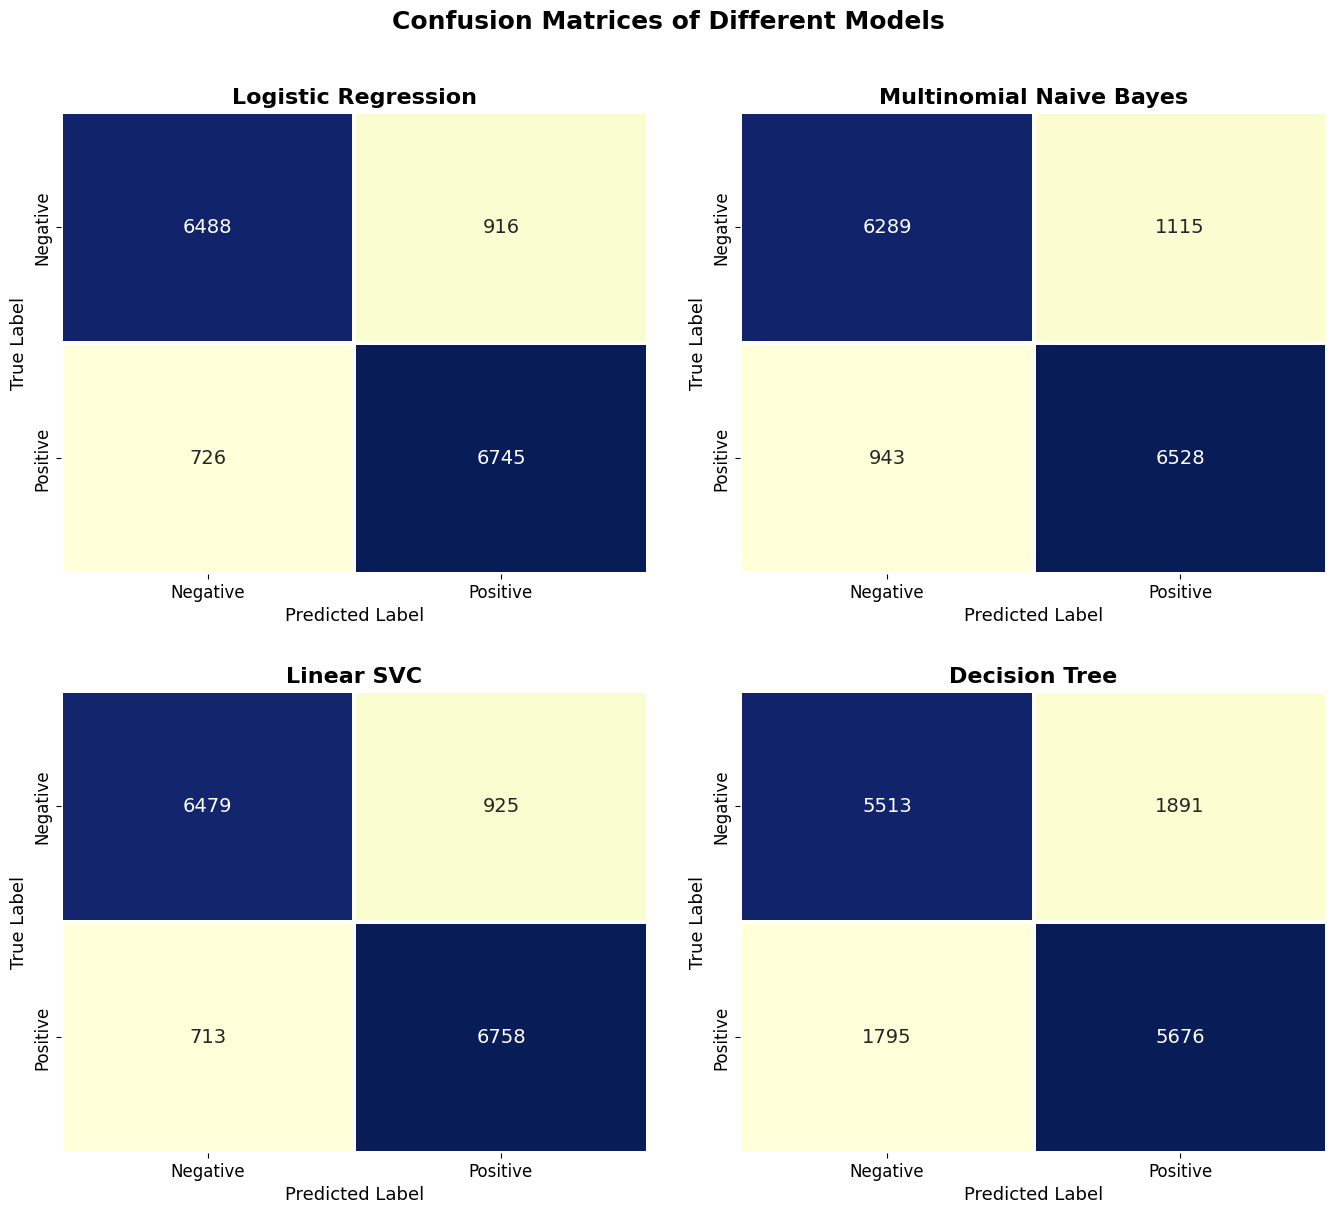

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Your trained models
models = {
    "Logistic Regression": best_log_reg,
    "Multinomial Naive Bayes": best_MNB,
    "Linear SVC": best_SVC,
    "Decision Tree": best_DT
}

# Create figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # Increased size for clarity
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)

    # Draw heatmap with enhanced styling
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'],
                cbar=False,
                linewidths=1.5, linecolor='white',
                annot_kws={"size": 14},  # Larger annotation text
                ax=axes[i])

    axes[i].set_title(f"{name}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel("Predicted Label", fontsize=13)
    axes[i].set_ylabel("True Label", fontsize=13)
    axes[i].tick_params(axis='both', labelsize=12)

# Adjust spacing between plots
plt.tight_layout(pad=3.0)
plt.suptitle("Confusion Matrices of Different Models", fontsize=18, fontweight='bold', y=1.03)
plt.show()


<h2>1.10.5 Plot ROC Curve</h2>

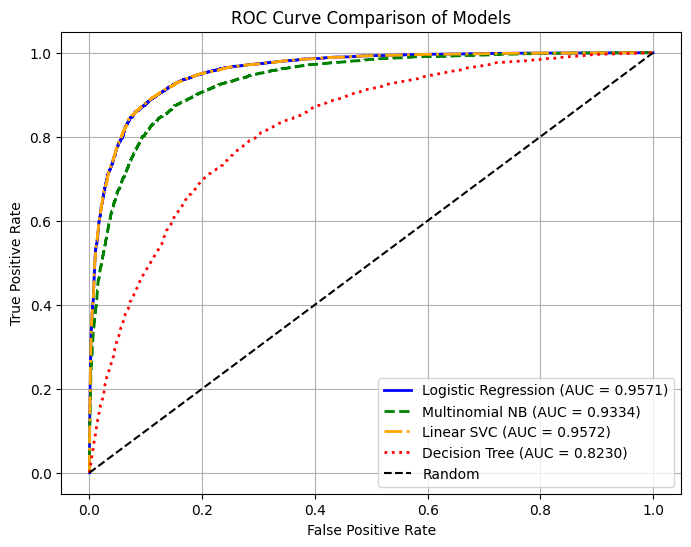

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your models are already trained
models = {
    "Logistic Regression": best_log_reg,
    "Multinomial NB": best_MNB,
    "Linear SVC": best_SVC,
    "Decision Tree": best_DT
}

# Define styles for each model
styles = {
    "Logistic Regression": {'color': 'blue', 'linestyle': '-', 'linewidth': 2},
    "Multinomial NB": {'color': 'green', 'linestyle': '--', 'linewidth': 2},
    "Linear SVC": {'color': 'orange', 'linestyle': '-.', 'linewidth': 2},
    "Decision Tree": {'color': 'red', 'linestyle': ':', 'linewidth': 2}
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Get predicted probabilities or decision scores
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(Y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve with custom style
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})", **styles[name])

# Plot diagonal line (random guess baseline)
plt.plot([0, 1], [0, 1], 'k--', label="Random")

# Final plot settings
plt.title("ROC Curve Comparison of Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


<h2>1.10.6 Plot Precision, Recall, F1-Score, and Overall Accuracy</h2>

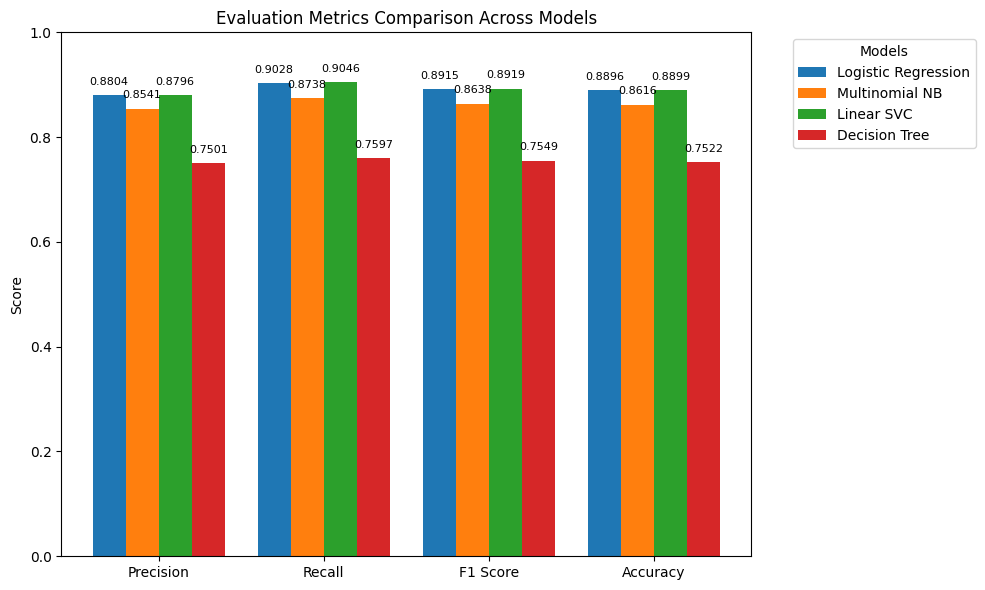

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define models
models = {
    "Logistic Regression": best_log_reg,
    "Multinomial NB": best_MNB,
    "Linear SVC": best_SVC,
    "Decision Tree": best_DT
}

# Define modern colors for each model
model_colors = {
    "Logistic Regression": '#1f77b4',   # Blue
    "Multinomial NB": '#ff7f0e',        # Orange
    "Linear SVC": '#2ca02c',            # Green
    "Decision Tree": '#d62728'          # Red
}

# Metrics to compute
metric_names = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
scores = {model: [] for model in models}

# Compute metrics
for name, model in models.items():
    y_pred = model.predict(X_test)
    scores[name].append(precision_score(Y_test, y_pred))
    scores[name].append(recall_score(Y_test, y_pred))
    scores[name].append(f1_score(Y_test, y_pred))
    scores[name].append(accuracy_score(Y_test, y_pred))

# Prepare plot
x = np.arange(len(metric_names))  # Metric group positions
width = 0.2  # Width of each bar

plt.figure(figsize=(10, 6))

# Plot bars for each model
for i, (model_name, model_scores) in enumerate(scores.items()):
    plt.bar(x + i * width, model_scores, width=width, label=model_name, color=model_colors[model_name])

# Customize plot
plt.xticks(x + width * 1.5, metric_names)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Evaluation Metrics Comparison Across Models')

# Move legend outside the plot
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add values on bars
for i, (model_name, model_scores) in enumerate(scores.items()):
    for j, score in enumerate(model_scores):
        plt.text(x[j] + i * width, score + 0.02, f"{score:.4f}", ha='center', fontsize=8)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show plot
plt.show()
